**Ho Wa Chu**

Spring 2023

CS 252: Mathematical Data Analysis and Visualization

Project 5: Clustering

In [17]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance

import kmeans

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1: K-means clustering

In this task, you will implement the K-means clustering algorithm and test your code on simple test data.

### 1a) Import `super_simple` data

- In the cell below, use pandas to load in `super_simple.csv` (30 x,y values), convert the Dataframe to a ndarray.
- Create a scatter plot below to see what the data look like.

Text(0, 0.5, 'Y')

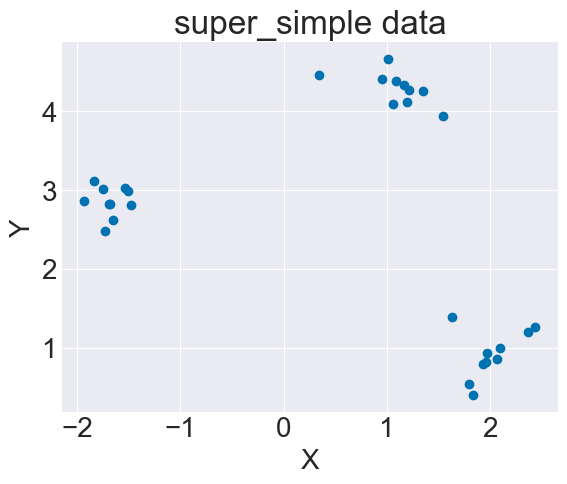

In [18]:
data = 'data/super_simple.csv'
df = pd.read_csv(data)
super_simple = df.values

plt.scatter(super_simple[:,0], super_simple[:,1])
plt.title("super_simple data")
plt.xlabel('X')
plt.ylabel('Y')

### 1b) Implement and test core K-means methods

In this task, you will implement the methods needed to cluster a dataset using K-means. The goal of this subtask is to create a scatterplot with each data sample color-coded based on the cluster it belongs to. You will be testing on the `super_simple` data.

In `kmeans.py` implement the following methods, using the following test code to help you out along the way:
- `set_data`: Update the data stored by the k-means clustering object.
- `get_data`: Return a copy of the data.
- `dist_pt_to_pt`: Compute the Euclidean distance from one data sample to one other. See below for formula.
- `dist_pt_to_centroids`: Compute the distance from one data sample to all the cluster centroids.
- `initialize`: Initalize K-means by setting the initial centroids
- `update_labels`: Assign each data sample to the nearest centroid
- `update_centroids`: Calculate each cluster's centroid, given the data samples that are assigned to it.
- `inertia`: Calculate the mean squared distance between each data sample and its (nearest) centroid. This is a 'quality of clustering' performance metric for analysis
- `cluster`: Run K-means to cluster the data. This is the actual method you call to do the clustering (above methods are helper methods).
- `plot_clusters`: Creates a scatterplot of the data (2D only) with data assigned to each cluster sharing the same color.

**Formula for Euclidean distance:**
$$dist \left (\vec{p_0}, \vec{p_1} \right ) = \sqrt{\left (d_{0} - e_{0} \right )^2 + \left (d_{1} - e_{1} \right )^2  + \ldots}$$

for data samples $\vec{p_0} = \left (d_{0}, d_{1}, \ldots \right )$ and $\vec{p_1} = \left (e_{0}, e_{1}, \ldots \right )$

#### Test constructor

In [19]:
cluster = kmeans.KMeans(super_simple)
print(f'Data isnt none? {np.all(cluster.data != None)}')
print(f'Data num samples isnt none? {np.all(cluster.num_samps != None)}')
print(f'Data num samples is {cluster.num_samps} and should be 30.')
print(f'Data num features isnt none? {np.all(cluster.num_features != None)}')
print(f'Data num features is {cluster.num_features} and should be 2.')

Data isnt none? True
Data num samples isnt none? True
Data num samples is 30 and should be 30.
Data num features isnt none? True
Data num features is 2 and should be 2.


#### Test `get_data`

In [20]:
super_simple_cpy = cluster.get_data()
super_simple_cpy[0,:] = -99
if np.all(cluster.data[0,:] == -99):
    print('You didnt return a copy of the data! Re-import the super_simple data and try again...')
else:
    print('All good!')

All good!


#### Test `dist_pt_to_pt`

In [21]:
a = np.array([1, 2, 3, 4])
b = 4*a
print(f'Your pt-to-pt distance is {cluster.dist_pt_to_pt(a, b)}')
print(f'Correct pt-to-pt distance is {np.linalg.norm(a-b)}')

Your pt-to-pt distance is 16.431676725154983
Correct pt-to-pt distance is 16.431676725154983


#### Test `dist_pt_to_centroids`

In [22]:
test_pt = np.array([[1, 2]])
test_centroids = np.array([[9, 9], [11, 11], [0, 0]])
print(f'Your pt-to-centroids distance is {cluster.dist_pt_to_centroids(test_pt.flatten(), test_centroids)}')
print(f'Correct pt-to-centroids distance is {distance.cdist(test_pt, test_centroids)[0]}')

Your pt-to-centroids distance is [10.63015 13.45362  2.23607]
Correct pt-to-centroids distance is [10.63015 13.45362  2.23607]


#### Test `initialize`

In [23]:
test_k = 3
init_centroids = cluster.initialize(test_k)
print(f'Initial cluster centroids shape is:\n{init_centroids.shape} and should be (3, 2)')

Initial cluster centroids shape is:
(3, 2) and should be (3, 2)


#### Test `update_labels`

In [24]:
# Consistently set initial centroids for test
init_centroids = np.array([[ 0.338, 4.4672], [-1.8401, 3.1123], [1.7931, 0.5427]])

new_labels = cluster.update_labels(init_centroids)
print(f'After the first update data label step, 1st 10 of your cluster assignments are:\n{new_labels[:10]}')
print('Your 1st 10 cluster assignments should be:\n[0 1 1 1 2 0 2 1 2 1]')

After the first update data label step, 1st 10 of your cluster assignments are:
[0. 1. 1. 1. 2. 0. 2. 1. 2. 1.]
Your 1st 10 cluster assignments should be:
[0 1 1 1 2 0 2 1 2 1]


#### Test `update_centroids` (1/2)

In [25]:
new_centroids, diff_from_prev_centroids = cluster.update_centroids(test_k, new_labels, init_centroids)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids}')
print('\nYou should see:')
print('''After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]
''')

After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]

You should see:
After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]



#### Test `update_centroids` (2/2)

Test special case when no sample gets assigned to one of the clusters.

In [26]:
np.random.seed(0)

print('Test 2: There are 5 clusters, but no samples assigned to 3rd and last cluster.')
print('There should be no Runtime warnings thrown and the centroid arrays should not have any nan values.')
print(100*'-')
test_k_2 = 5
new_labels_2 = new_labels.copy()
new_labels_2[new_labels_2 == 2] = 3
init_centroids_2 = np.vstack([init_centroids, np.random.random(size=(2, 2))])
new_centroids_2, diff_from_prev_centroids_2 = cluster.update_centroids(test_k_2, new_labels_2, init_centroids_2)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids_2}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids_2}')

Test 2: There are 5 clusters, but no samples assigned to 3rd and last cluster.
There should be no Runtime warnings thrown and the centroid arrays should not have any nan values.
----------------------------------------------------------------------------------------------------
After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [-1.6855   2.8272 ]
 [ 2.00717  0.9184 ]
 [ 1.1924   4.1182 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [-3.4786   2.2845 ]
 [ 1.45836  0.20321]
 [ 0.58964  3.57332]]


You should see: 
    
    After the first centroid update, your cluster assignments are:
    [[ 1.09087  4.29295]
    [-1.68133  2.85917]
    [some_float  some_float ]
    [ 2.00717  0.9184 ]
    [some_float  some_float ]]
    Your difference from previous centroids:
    [[ 0.75287 -0.17425]
    [ 0.15877 -0.25313]
    [some_float  some_float ]
    [some_float  some_float]
    [some_float  some_float]]

**NOTE:** Each `some_float` above should be a different random float value and not `nan` or all `0`s.

#### Test `inertia`

In [27]:
cluster.centroids = new_centroids
cluster.data_centroid_labels = new_labels
print(f'After the first test k-means update, your inertia is:\n{cluster.compute_inertia()}\nIt should be\n0.10738760429999998')

After the first test k-means update, your inertia is:
0.10738760429999998
It should be
0.10738760429999998


#### Test `plot_clusters` and `cluster`

In the cell below:

- Run K-means on the `super_simple` dataset, picking $k$ that makes sense.
- Run `plot_clusters` to generate a scatterplot showing the cluster assignments of the data in different colors. Nearby samples in your scatterplot should have the same color most of the times that you run your code (*this may not be true **every** time you run your code to generate the plot and that is expected! You are aiming for most of the time.*). Here is an example:

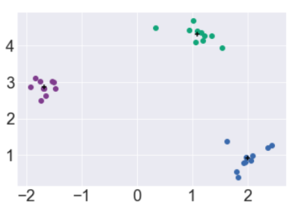

Total number of iterations K-means ran for: 4


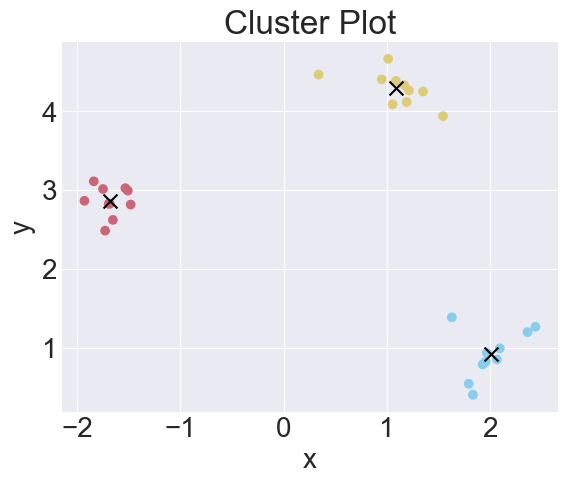

In [28]:
from kmeans import *
k_means = KMeans(super_simple)
k_means.cluster(k = 3, verbose = True)
k_means.plot_clusters()

### 1c) Determining the number of clusters $k$

In this task, you will explore how to determine the number of clusters in a dataset.

- Implement `elbow_plot` in `kmeans.py`.
- Create an elbow plot below for the `super_simple` dataset. It should look like the below image.

**NOTE:** Make sure to include a meaningful x label, y label, and x tick marks.

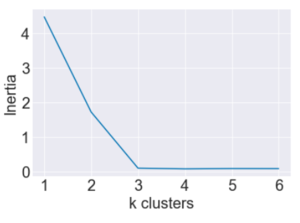

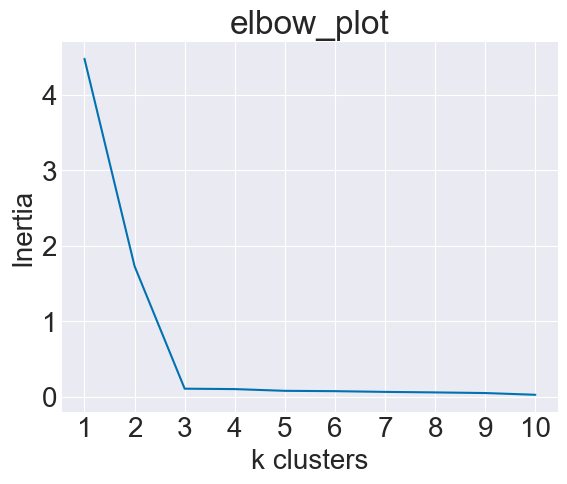

In [29]:
k_means.elbow_plot(10)

**Question 1:** How many clusters are there in the `super_simple` data, based on the elbow plot that you made? Briefly explain how you determined this.

**Answer 1:** 
There are 3 clusters in the super_simple data. You can tell in the elbow plot that the point of diminishing returns was at 3. Afterwards, increasing the amount of clusters k would lead to a plateau of the inertia not changing. We can also use the original scatter plot of the data to predict there would be three clusters. 

#### 1d) Clustering the `five_blobs` dataset

Load in the `five_blobs` dataset then in the cell below:
- create a scatterplot showing the 2D dataset (without any clustering).
- run K-means to cluster the dataset with a reasonable number of clusters (based on what you observe in the scatterplot).
- create a scatterplot showing the clustered data.

Text(0.5, 1.0, 'five_blobs')

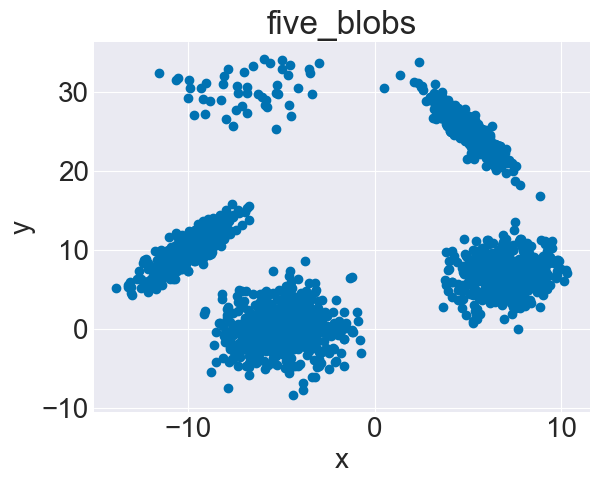

In [15]:
data = 'data/five_blobs.csv'
five_df = pd.read_csv(data)
arr = five_df.values

plt.scatter(arr[:,0], arr[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('five_blobs')

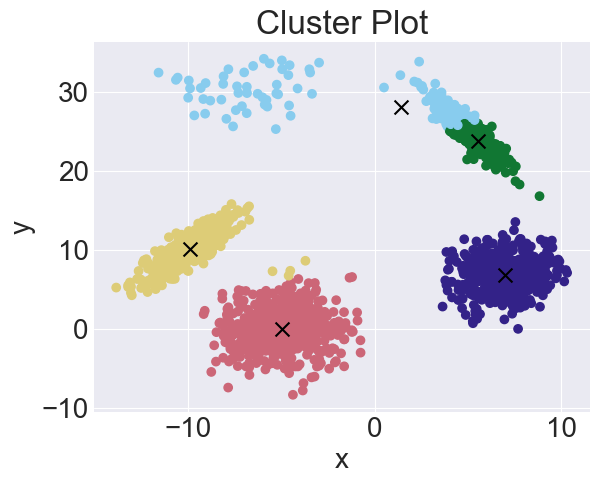

In [16]:
# place me before you cluster the dataset
np.random.seed(0)

five_k = KMeans(arr)
five_k.cluster(5)
five_k.plot_clusters()

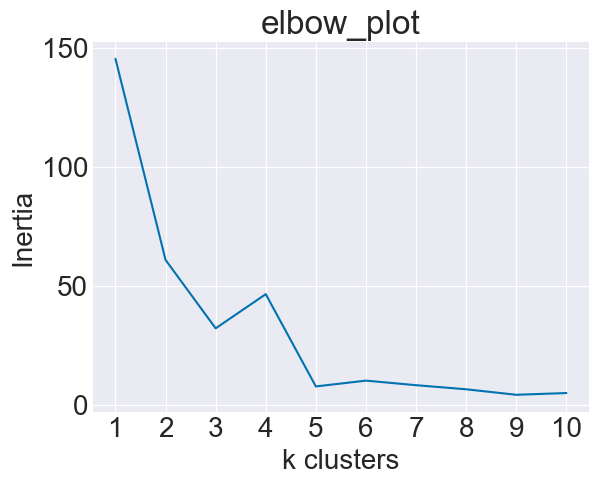

In [17]:
five_k.elbow_plot(10)

#### Questions

**Question 2:** Run K-means and make the above scatterplot showing the clusters at least 5 times, changing the random seed value each time (e.g. with `np.random.seed(0)`, `np.random.seed(1)`, etc.). What do you observe about how the cluster assignments match up with the clusters that you see visually? **Why does this happen?**

**Question 3:** Have your code in above the cell also generate an elbow plot with `k` running from 1 to 10. As you change the random seed, how predictive is the elbow plot of the number of clusters in the dataset? In order words, if you had to only rely on the elbow plot to determine the number of clusters (without looking at the scatterplot), how often would you be correct? **Explain your reasoning.**

**Answer 2:** 
The seed changes the initialization phase of kmeans. This means that the first set of centroids will be different and have different data samples assinged to them. We can also see there is a difference in colors, meaning the order of clusters changed. For example, let say the red cluster was c1. Originally at the bottom of the plot, the c1 cluster became the top left cluster when the seed is changed to 2. We can also compare the seed 2 and 4 where a blob of samples were separated into two clusters despite their closeness to one another.

**Answer 3:** 
By changing the number of seeds, the elbow plot does change as well. For certain seeds like 2, it is more difficult because I can also see 4 clusters as the point of diminishing returns. If we were to only rely on an elbow plot, I would say we will be correct most of the time but not always. This is due to the cases that I mentioned in question three where a single blob could have two separate clusters. This is the case where if we had 4 clusters, the blob would become one single clusters and the inertia will be minimized. 

#### Run K-means multiple times, save the best clustering

To address what you observed above, we can run K-means multiple times and take the best results to determine the final clustering. Implement `cluster_batch` to run K-means multiple times with a chosen $k$ value.

In the cell below, run `cluster_batch` with 10 iterations for every $k$ value and make a new scatterplot of the cluster assignments.

Total number of iterations K-means ran for: 5
7.116345982439034
Total number of iterations K-means ran for: 8
7.115591545930545
Total number of iterations K-means ran for: 4
7.115689109472281
Total number of iterations K-means ran for: 7
9.799011010893887
Total number of iterations K-means ran for: 5
8.484294997424234
Total number of iterations K-means ran for: 5
9.981398645073757
Total number of iterations K-means ran for: 10
9.980574455633052
Total number of iterations K-means ran for: 9
7.116345982439034
Total number of iterations K-means ran for: 3
10.533249665229732
Total number of iterations K-means ran for: 3
21.92722457141357


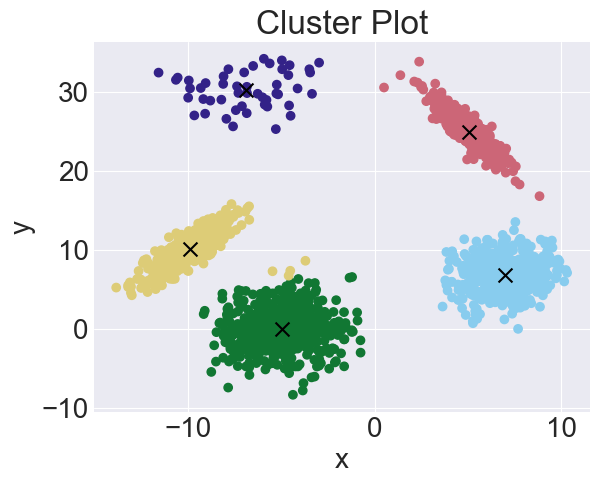

In [27]:
# place me before you batch cluster the dataset
np.random.seed(0)
five_k.cluster_batch(k = 5, n_iter = 10, verbose = True)
five_k.plot_clusters()

**Question 4:** In way ways (if any) did the clustering improve? **Why?**

**Answer 4:** 
In this case, we are selecting the kmeans iteration that results in the smallest inertia. This is an improvement because in this case, we are securing the case where the centroid had thee best initial placement, which gives us results that minimize the mean squared distance between every data sample and its assigned centroid. 

### 1e) Update elbow plot for the `five_blobs` dataset

Now that you have experimented with `cluster` and `cluster_batch`, update your `elbow_plot` method to use `cluster_batch` instead of `cluster`. To do this, add a keyword argument `n_iter` to `elbow_plot`. Give it a default value of 1. (*And don't forget to update the docstring to include the new parameter!*)

In the cell below, test out your updated `elbow_plot` method using the same max $k$ value and number of iterations (for each $k$ value) as you used above. Create an elbow plot showing the inertia with different $k$ values.

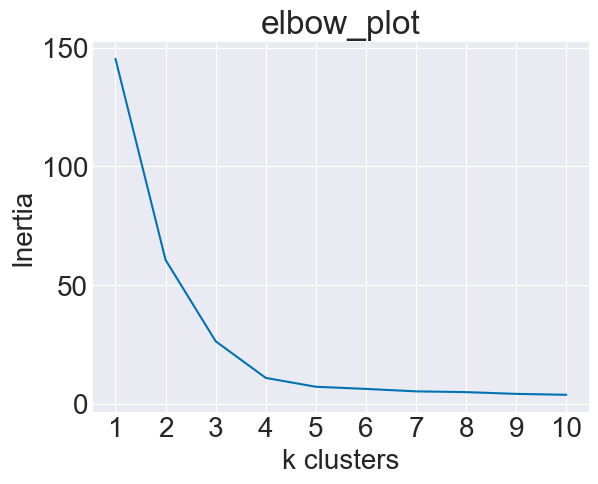

In [22]:
five_k.elbow_plot(10, 10)

**Question 5:** How predictive is the updated elbow plot of the number of clusters in the dataset compared to the previous ones that you made?

**Answer 5:** 
Compared to our previous elbow plot, this one does help predict better number of clusters. The elbow plot is smoother and accounts for the sudden influxes of the previous elbow plot. By running cluster in multiple iterations, we can minimize the error generated from a centroid being placed in a outlier position.

## Task 2: Improved initialization and cluster detection

Here, we will explore more sophisticated techniques for initializing K-means and determining the number of clusters in a dataset. 

### 2a) K-means++ initialization

- In `kmeans.py::initialize_plusplus` implement the K-means++ initialization algorithm.

Recall that the idea is to set the 1st centroid to be a random data sample. To determine each of the remaining centroids, compute the MINIMUM distance from each data sample to ONLY the centroids ALREADY DEFINED (i.e. what's the closest distance of each point to centroids that are currently defined). For example, if we're determining centroid 3, we would find the distance between each data sample and the closest centroid (1 or 2...whichever is closer). Then, we use these distances to create a probability distribution. The next centroid is determined by selecting a data sample in the dataset according to this probability distribition. The equation for the probability distribution is:$$p(x_i) = \frac{D(x_i)^2}{\sum_{j=1}^N D(x_j)^2}$$ where $D(x_i)$ is the distance between data sample $x_i$ and the nearest centroid already defined and $N$ is the number of data samples, like usual.

- Update `cluster` to take in an keyword argument `init_method='random'`. If the user selects 'random', run the old method. If the user selects 'kmeans++', run the K-means++ initialization.
- Create a scatterplot below with K-means++ initialization

Total number of iterations K-means ran for: 2


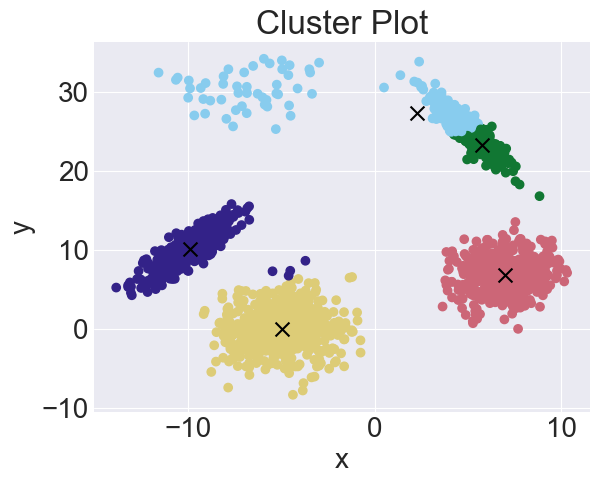

In [34]:
np.random.seed(0)
five_k.cluster(k = 5, verbose = True, init_function = 'kmeans++')
five_k.plot_clusters()

**Question 6:** Did the clustering get better compared to the non-batch clustering result from Task 1c? **Why?**

**Answer 6:** 
The clustering did get better now that we are using a better algorithim to find the initial centroids. Rather than randomly choosing all centroids, we choose one random centroid and calculate the rest through measuring the probabilities of each sample becoming a new centroid. This method still has a chance of placing an outlier as a new centroid, but since we used minimum distance, we are setting those samples that are furthest by minimum distance with a higher probability than simply using the sample furthest away. 

#### Compare number of iterations needed for K-means to converge

- Add support for the `init_method` optional parameter in `cluster_batch`.
- Add a return value to `cluster_batch`: the mean number of iterations required for each K-means instance to converge.
- Below, print out the mean number of iterations required for `random` and `kmeans++` initialization methods with the `five_blobs` dataset.

In [35]:
np.random.seed(0)
print(five_k.cluster_batch(5, 10, init_method = 'random'))
print(five_k.cluster_batch(5, 10, init_method = 'kmeans++'))

6.1
5.4


**Question 7:** Which initialization method is better with respect to number of iterations required to converge?

**Answer 7:**
The kmeans++ is a better method because it takes lower amount of iterations to converge. This makes sense because kmeans++ places centroids by calculating the largest minimum distance from each sample to its assigned centroid. This gets rid of the randomness we get by the random method which places the centroids randomly.

## Task 3: Image Segmentation and compression

In this task, you will apply K-means to one image and to compress it (*image compression*). The idea is that you will find $k$ RGB color centroids in the image, then replace each pixel in the image with the nearest centroid. This will compress an image, by only using $k$ colors to represent it. You can also think of this as doing a simple image region segmentation: regions with similar colors will belong to the same cluster. It also makes some cool retro effects!

### 3a) Load in baby bird image

- Use the imported `imread` method below to load in the `baby_bird.jpg` image.
- Use `plt.imshow` to display it in the notebook below. Turn off plot ticks!

In [39]:
from matplotlib.image import imread

(202, 303, 3)


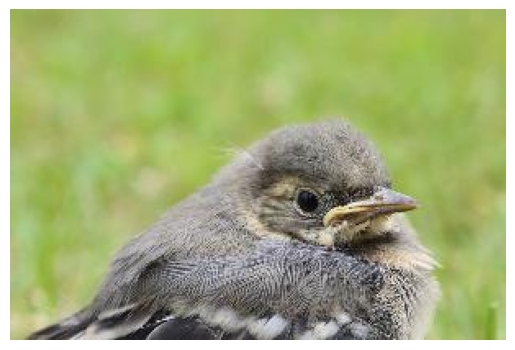

In [40]:
image = imread('data/baby_bird.jpg')
print(image.shape)
plt.imshow(image)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.grid(False)

### 3b) Preprocess image

- Fill in the function below to collapse (flatten) the 2D image into a big 1D vector of RGB values. For example, for the bird image, your function should take the shape `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`.
- Reshape the bird image from `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`. Final shape for baby bird image should be: `(61206, 3)`

In [41]:
def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.
    
    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)
    
    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''
    img = img.reshape([img.shape[0]*img.shape[1], img.shape[2]])
    return img

In [42]:
image = flatten(image)
print(image.shape)

(61206, 3)


### 3c) Cluster RGB values in image

- Run K-means on the bird data vector.
- Implement `replace_color_with_centroid`: replace every pixel in the image with the nearest centroid RGB value.
- Compress the image by running `replace_color_with_centroid`.

In [43]:
cluster_RGB = KMeans(np.array(image))
cluster_RGB.cluster()
cluster_RGB.replace_color_with_centroid()

### 3d) Postprocessing and visualization

- Rehape the compressed image data back to its original dimensions.
- Plot it below.

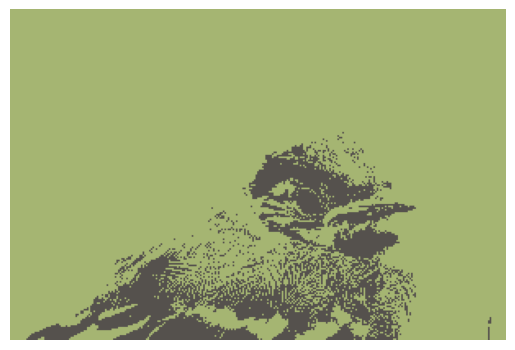

In [44]:
orig = cluster_RGB.data.reshape([202, 303, 3])
plt.imshow(orig)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.grid(False)

### 3e) Run K-means and compress an image of your choice

Smaller images run a lot faster.

(134, 202, 3)


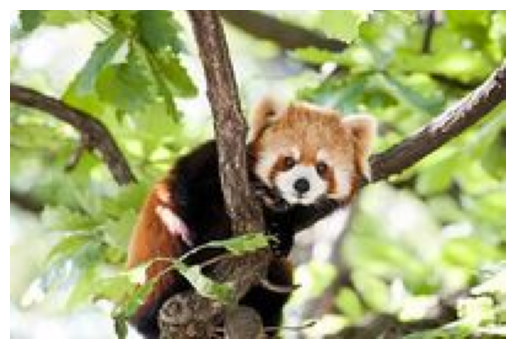

In [45]:
red_panda = imread('data/red_panda.jpg')
print(red_panda.shape)
plt.imshow(red_panda)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.grid(False)

(27068, 3)


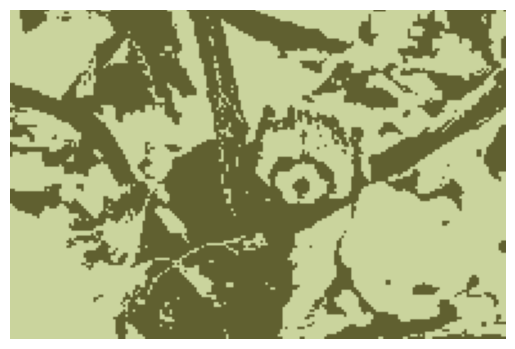

In [46]:
red_panda = flatten(red_panda)
print(red_panda.shape)

red_panda_cluster = KMeans(np.array(red_panda))
red_panda_cluster.cluster()
red_panda_cluster.replace_color_with_centroid()

orig_red = red_panda_cluster.data.reshape([134, 202, 3])
plt.imshow(orig_red)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.grid(False)

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

### 1) Image compression

- Run K-means on other images and quantify the reduction in space required to store each image (with different values of k).

(100, 100, 3)


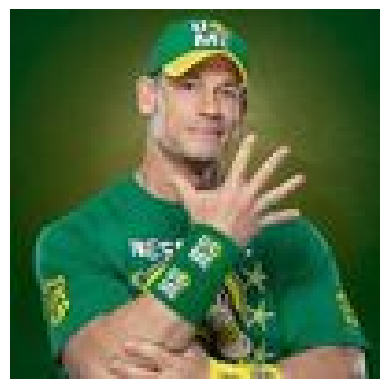

In [87]:
john = imread('data/john_cena.jpg')
print(john.shape)
plt.imshow(john)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.grid(False)

(10000, 3)


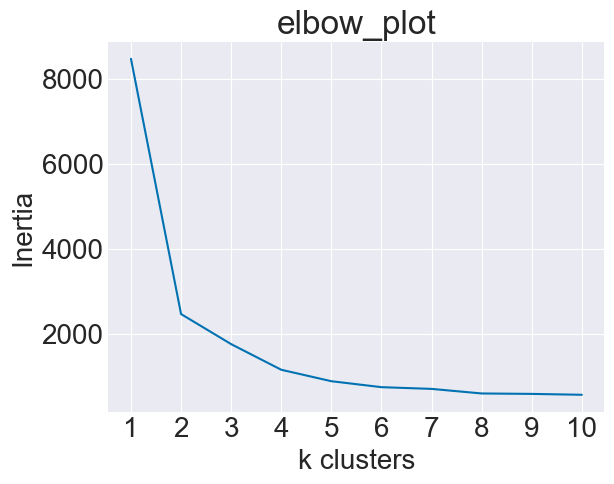

In [88]:
john = flatten(john)
print(john.shape)

john_cluster = KMeans(np.array(john))
john_cluster.elbow_plot(10,3)

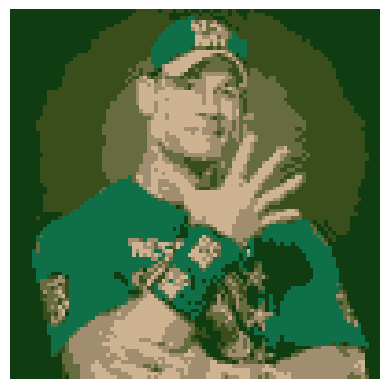

In [89]:
john_cluster.cluster(6)
john_cluster.replace_color_with_centroid()

orig_john = john_cluster.data.reshape([100, 100, 3])
plt.imshow(orig_john)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.grid(False)

In this extension, I performed a image compression on a image of John Cena. To figure out the suitable amount of clusters, I used the elbow plot method which runs cluster_batch from k = 1 to 10 using 3 iterations each. Looking at the plot, I concluded that 6 clusters would set as a good amount as that's where the diminishing returns begin. After running the cluster method with k = 6 and reshaped the data back into the image form, we can see how the pixels of each clusters represent the color of its assigned centroids. First noticing the background, we can see there is three different shades of gain. I think this is very importnat for image compression becasue in the original image, we can see how the lighting converged in towards the center of the image. Having k = 6, the image kept its structure really well. you are still able to see the general face and shadows of John Cena. 

### 2) Detect number of clusters in other datasets

- Cluster other datasets and create elbow plots to detect the number of clusters.

### 3) Cluster additional datasets

(7050, 2)


Text(0.5, 1.0, '# of comments vs. # of reactions on 7049 videos')

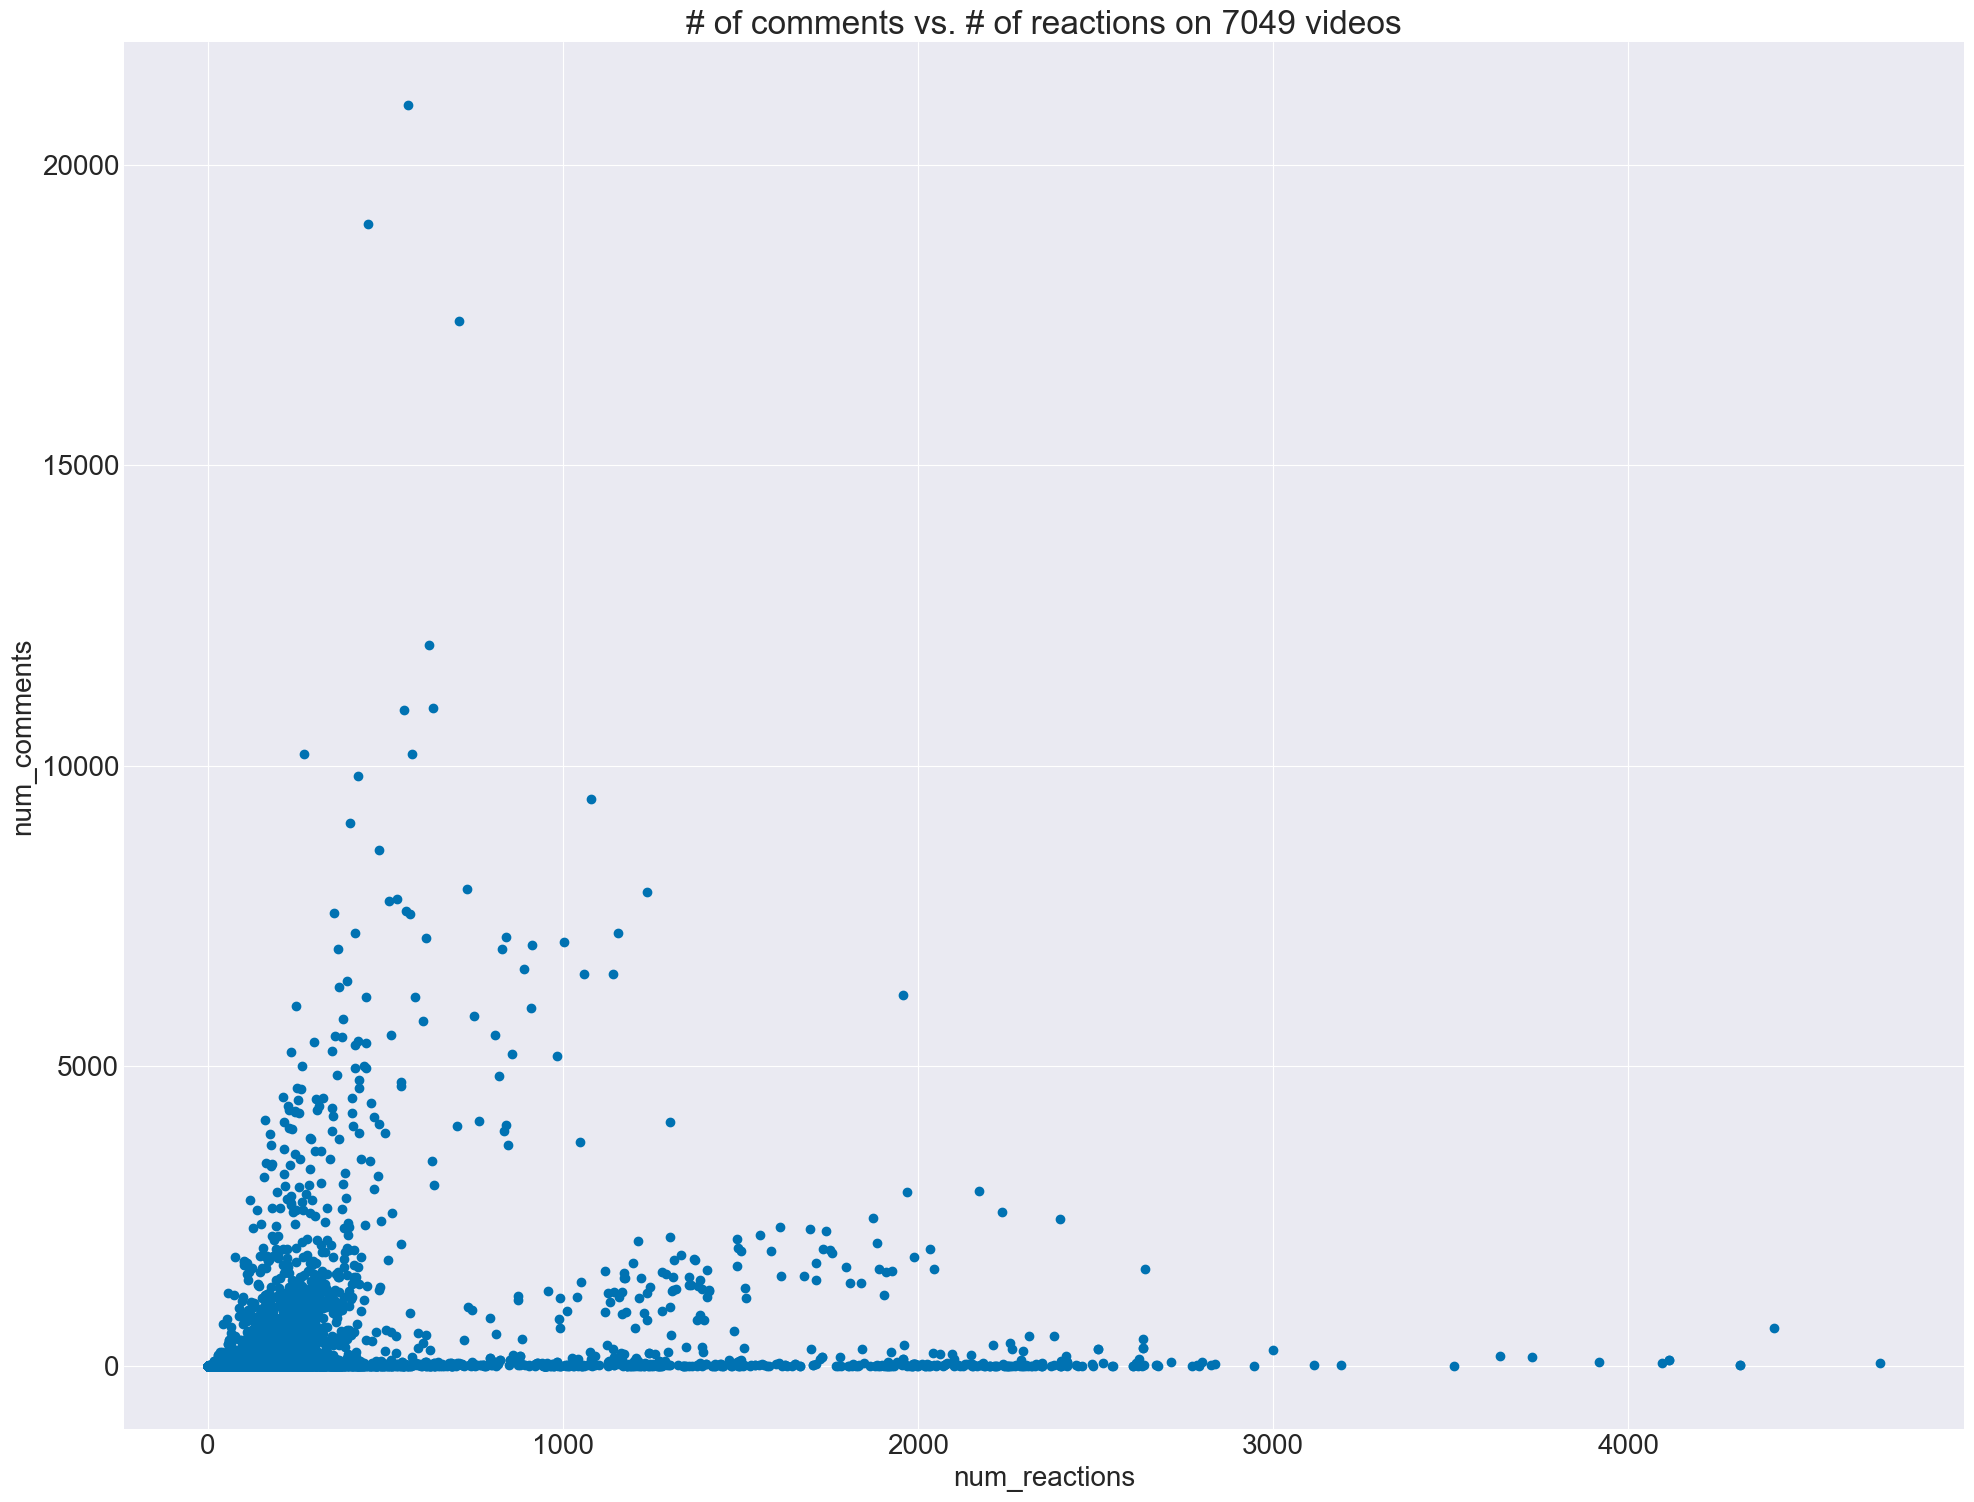

In [48]:
data = 'data/Live.csv'
df = pd.read_csv(data)
arr = df.values
print(arr.shape)

plt.subplots_adjust(top = 3, right = 3)
plt.scatter(arr[:,0], arr[:,1])
plt.xlabel('num_reactions', fontsize = 20)
plt.ylabel('num_comments', fontsize = 20)

plt.title('# of comments vs. # of reactions on 7049 videos')

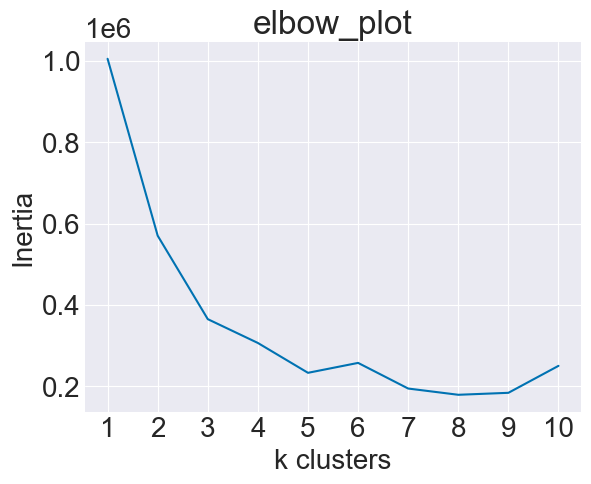

In [67]:
vid_cluster = KMeans(arr)
vid_cluster.elbow_plot(10, 3)

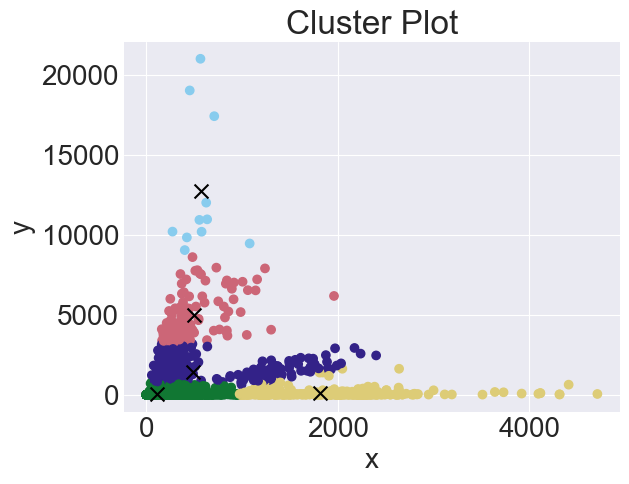

In [69]:
vid_cluster.cluster(5)
vid_cluster.plot_clusters()

Here, I used a dataset that stored the amount of comments and amount of reactions in 7049 videos. I first began by using a elbow plot to figure out the best number of clusters. I settled on 5 and ran kmeans. After doing so, I plotted the clusters and we can see visually that it does agree with the original date. Applying this to our real world data, clustering can be helpful here to sort out all the videos to different sections. Here, we can 5 clusters into (lots of reactions and little comments, lots of comments little reations, medium comments and little reactions, little comments and medium reactions, and little reactions and little comments. We can then perform further analysis to figure out what type of videos attract viewers to comment or react to those videos

### 4) Other cluster detection metrics

- Research number-of-clusters detection metrics (e.g. silhouette score) and compare them to inertia on a dataset of your choice. Which does a better job at detecting number of clusters?

### 5) Animate the clustering process

- Make an animation showing K-means clustering unfolding across iterations until the algorithm converges. 

0
0


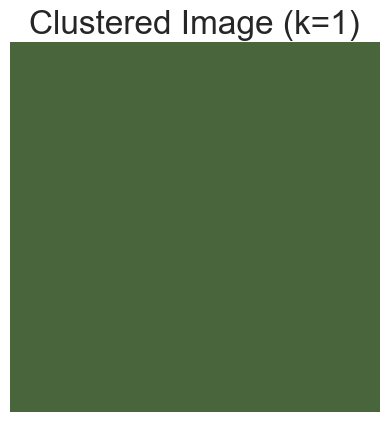

In [93]:
from matplotlib.animation import FuncAnimation

def update_clusters(frame):
    plt.clf()
    print(frame)
    
    john_cluster.cluster(frame + 1)

    john_cluster.replace_color_with_centroid()

    orig_john = john_cluster.data.reshape([100, 100, 3])
    
    im = plt.imshow(orig_john)
    
    plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
    plt.grid(False)
    plt.title(f"Clustered Image (k={frame+1})")
    
    return [im]

frames = 6
interval = 100
ani = FuncAnimation(plt.gcf(), update_clusters, frames=frames, interval=interval, blit=True)

plt.show()

### 6) Leader algorithm

- Implement the leader algorithm and compare clustering results and runtime with K-means on datasets of your choice.